**Table of contents**<a id='toc0_'></a>    
- 1. [Function definitions](#toc1_)    
- 2. [load pkl files](#toc2_)    
- 3. [concatenate df's](#toc3_)    
- 4. [Exploratory Analysis](#toc4_)    
- 5. [Histograms](#toc5_)    
  - 5.1. [ch2](#toc5_1_)    
    - 5.1.1. [$\sigma$](#toc5_1_1_)    
      - 5.1.1.1. [fitting](#toc5_1_1_1_)    
    - 5.1.2. [$\tau$](#toc5_1_2_)    
    - 5.1.3. [scale](#toc5_1_3_)    
    - 5.1.4. [Modification:  rectangular cut](#toc5_1_4_)    
      - 5.1.4.1. [$ \sigma$](#toc5_1_4_1_)    
        - 5.1.4.1.1. [fitting](#toc5_1_4_1_1_)    
      - 5.1.4.2. [$\tau$](#toc5_1_4_2_)    
        - 5.1.4.2.1. [fitting here](#toc5_1_4_2_1_)    
        - 5.1.4.2.2. [Fitting with iMinuit](#toc5_1_4_2_2_)    
      - 5.1.4.3. [scale](#toc5_1_4_3_)    
  - 5.2. [ch1](#toc5_2_)    
  - 5.3. [ch0](#toc5_3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

Presently, this notebook only contains wf from ch2

In [1]:
import sys
# import os
import numpy as np
import pandas as pd
import pickle
# from scipy.stats import chisquare
# from scipy.integrate import simpson

# import matplotlib
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
# from matplotlib.ticker import AutoMinorLocator
# from matplotlib.ticker import FormatStrFormatter

# from termcolor import colored
# from tqdm.notebook import tqdm
from scipy.ndimage import gaussian_filter
from scipy.optimize import curve_fit

In [2]:
import matplotlib.patches as patches

In [3]:
np.set_printoptions(formatter={'float': lambda x: f"{x:10.4g}"})

In [4]:
%matplotlib ipympl 

# 1. <a id='toc1_'></a>[Function definitions](#toc0_)

In [5]:
def f_gauss(x, g_mean, g_sigma, g_k):#, g_shift, g_m, g_c):
    return g_k*(1/(g_sigma*np.sqrt(2*np.pi)))*np.exp(-0.5*((x-g_mean)/g_sigma)**2)
#+ (np.heaviside(x_values -g_shift, 0))*(g_m*x_values + g_c)

In [6]:
def red_chisq(f_obs, f_exp, fittedparameters):
    chisqr = np.sum((f_obs - f_exp)**2 / f_exp)
    # chisqr = np.sum((f_obs - f_exp)**2 / np.abs(f_exp)) # changed
    ndf = f_obs.shape[0]
    return chisqr/(ndf -fittedparameters.shape[0])

# 2. <a id='toc2_'></a>[load pkl files](#toc0_)

In [7]:
# all_clean_catalogues = []
# for run_number in run_number_ls:
#     all_clean_catalogues.append(f'clean_catalogue_run000{run_number}.pkl')

In [8]:
# selected_clean_catalogue_path = os.path.join(output_folder, all_clean_catalogues[3])
# selected_clean_dict = pickle.load(open(selected_fit_catalogue_path, 'rb'))
# selected_clean_dict #['ch2']

In [9]:
output_folder = '/home/sarthak/my_projects/argset/output_folder'
# output_folder = '/home/sarthak/my_projects/argset/backup'

In [10]:
run_number_ls = [52, 53, 54, 61, 62, 63]
# run_number_ls = [52, 61]

In [11]:
all_fit_catalogues = []
for run_number in run_number_ls:
    all_fit_catalogues.append(f'{output_folder}/fit_catalogue_run000{run_number}.pkl')

In [12]:
all_fit_catalogues

['/home/sarthak/my_projects/argset/output_folder/fit_catalogue_run00052.pkl',
 '/home/sarthak/my_projects/argset/output_folder/fit_catalogue_run00053.pkl',
 '/home/sarthak/my_projects/argset/output_folder/fit_catalogue_run00054.pkl',
 '/home/sarthak/my_projects/argset/output_folder/fit_catalogue_run00061.pkl',
 '/home/sarthak/my_projects/argset/output_folder/fit_catalogue_run00062.pkl',
 '/home/sarthak/my_projects/argset/output_folder/fit_catalogue_run00063.pkl']

In [13]:
fit_dict_52 = pickle.load(open( all_fit_catalogues[0], 'rb'))

In [14]:
fit_dict_53 = pickle.load(open( all_fit_catalogues[1], 'rb'))

In [15]:
fit_dict_54 = pickle.load(open( all_fit_catalogues[2], 'rb'))

In [16]:
fit_dict_61 = pickle.load(open( all_fit_catalogues[3], 'rb'))

In [17]:
fit_dict_62 = pickle.load(open( all_fit_catalogues[4], 'rb'))

In [18]:
fit_dict_63 = pickle.load(open( all_fit_catalogues[4], 'rb'))

# 3. <a id='toc3_'></a>[concatenate df's](#toc0_)

In [19]:
fit_dict_ls = [fit_dict_52, fit_dict_53, fit_dict_54, fit_dict_61, fit_dict_62, fit_dict_63]
ch_str_ls = ['ch0', 'ch1', 'ch2']

fit_catalogue = {}
for ch_x in ch_str_ls:
    fit_catalogue_x = []
    for fit_dict in fit_dict_ls:
        fit_catalogue_x.append(fit_dict[ch_x])
    fit_catalogue[ch_x] = pd.concat(fit_catalogue_x, ignore_index=True)

# 4. <a id='toc4_'></a>[Exploratory Analysis](#toc0_)

the ratio of good fit waveforms to clean forms

In [20]:
(fit_catalogue['ch0'][fit_catalogue['ch0']['chisqr']< 2.0]).shape[0]/(fit_catalogue['ch0']).shape[0]

1.9585761151642755e-05

In [21]:
(fit_catalogue['ch1'][fit_catalogue['ch1']['chisqr']< 2.0]).shape[0]/(fit_catalogue['ch1']).shape[0]

0.9136811906042676

In [22]:
(fit_catalogue['ch2'][fit_catalogue['ch2']['chisqr']< 2.0]).shape[0]/(fit_catalogue['ch2']).shape[0]

0.8942607473762789

How many times fit failed to converge?

In [23]:
fit_catalogue['ch0']['fit_param'].isnull().sum()

247

In [24]:
fit_catalogue['ch1']['fit_param'].isnull().sum()

16

In [25]:
fit_catalogue['ch2']['fit_param'].isnull().sum()

6

In [26]:
fit_catalogue['ch0'].index.values.shape

(102115,)

In [27]:
fit_catalogue['ch0'][fit_catalogue['ch0']['chisqr']< 2.0]

,event_counter,wf_ch0,fit_param,chisqr
850,20306.0,"[223.0, 248.0, 274.0, 246.0, 246.0, 243.0, 203...","[476.00006471537387, 1.3453531702648318, 44.85...",1.658237
22786,2858.0,"[200.0, 177.0, 169.0, 176.0, 200.0, 191.0, 222...","[408.00005480665595, 3.170604580699865, 48.689...",1.883483


Drop NA rows

In [28]:
for ch_x in ch_str_ls:
    fit_catalogue[ch_x] = fit_catalogue[ch_x].dropna()

In [29]:
# sanity check: dropna works!
fit_catalogue['ch0']['fit_param'].isnull().sum()

0

# 5. <a id='toc5_'></a>[Histograms](#toc0_)

extracting param values

In [30]:
param_dict = {}
for ch_x in ch_str_ls:
    t0_ls = []
    sigma_ls = []
    tau_ls = []
    scale_ls = []
    fit_param_x = {}
    for loop_index in fit_catalogue[ch_x].index.values:
        loop_fit_param = fit_catalogue[ch_x].loc[loop_index]['fit_param']
        t0_ls.append(loop_fit_param[0])
        sigma_ls.append(loop_fit_param[1])
        tau_ls.append(loop_fit_param[2])
        scale_ls.append(loop_fit_param[3])
    fit_param_x['t0'] = t0_ls
    fit_param_x['sigma'] = sigma_ls
    fit_param_x['tau'] = tau_ls
    fit_param_x['scale'] = scale_ls
    param_dict[ch_x] = fit_param_x

In [31]:
fit_catalogue['ch0'].index.values.shape

(101868,)

In [32]:
n_param = fit_catalogue['ch0']['fit_param'][0].shape[0]

## 5.1. <a id='toc5_1_'></a>[ch2](#toc0_)

Text(0.5, 1.0, 't0')

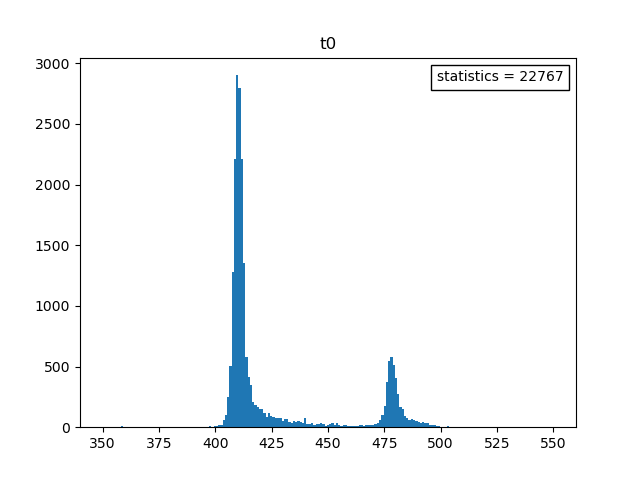

In [33]:
ch_x = ch_str_ls[2]
plt.close(1)
fig1, ax1 = plt.subplots()
text_in_box = AnchoredText(f"statistics = {len(param_dict[ch_x]['t0'])}", \
                                       loc='upper right')
ax1.add_artist(text_in_box)
ax1.hist(param_dict[ch_x]['t0'], bins = np.linspace(350, 550, 200))
ax1.set_title('t0')

### 5.1.1. <a id='toc5_1_1_'></a>[$\sigma$](#toc0_)

Text(0.5, 1.0, '$\\sigma$')

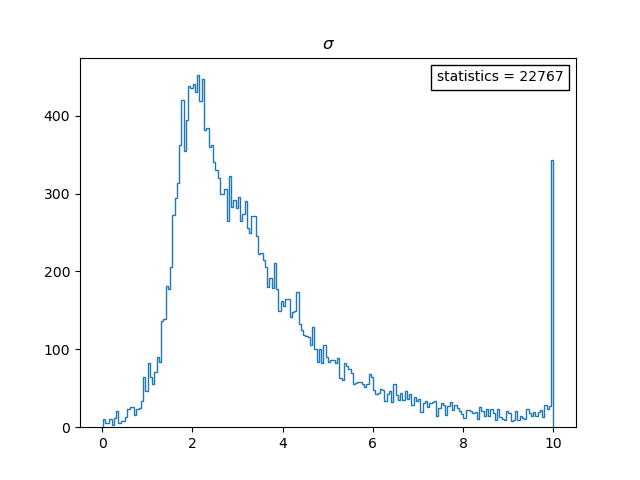

In [34]:
plt.close(2)
fig2, ax2 = plt.subplots()
hist_content, hist_edges, _hist_obj= ax2.hist(param_dict[ch_x]['sigma'], bins=200, histtype='step', label = 'data') #, bins= np.linspace(1.0, 6.0, 10))
text_in_box = AnchoredText(f"statistics = {len(param_dict['ch2']['sigma'])}", \
                                       loc='upper right')
ax2.add_artist(text_in_box)
ax2.set_title('$\\sigma$')

#### 5.1.1.1. <a id='toc5_1_1_1_'></a>[fitting](#toc0_)

In [35]:
x_range = range(30, 49)

p0_input = [2, 0.45, 500.0]
bounds_input = ([1.0, 0.0, 500.0], [10.0, 1.0, 600.0])
fitted_parameters, _pcov = curve_fit(f_gauss, 
                            hist_edges[x_range], hist_content[x_range], \
                            p0 = p0_input, 
                            bounds = bounds_input,
                            sigma = np.sqrt(hist_content[x_range]),
                            absolute_sigma=True,
                            )

chisqr_value = red_chisq(hist_content[x_range], \
    f_gauss(hist_edges[x_range], *fitted_parameters), fitted_parameters
    )

chisqr_value

1.3993587214868806

In [36]:
fitted_parameters

array([     2.056,     0.4813,        536])

In [37]:
ax2.plot(hist_edges[x_range], f_gauss(hist_edges[x_range], *fitted_parameters), 
        #  color='red', 
         label='fitted function')
ax2.legend()
chisqr_in_box = AnchoredText(f"red. chisqr = {chisqr_value:.2f}", \
                                       loc='center right')
ax2.add_artist(chisqr_in_box)

### 5.1.2. <a id='toc5_1_2_'></a>[$\tau$](#toc0_)

Text(0.5, 1.0, '$\\tau$')

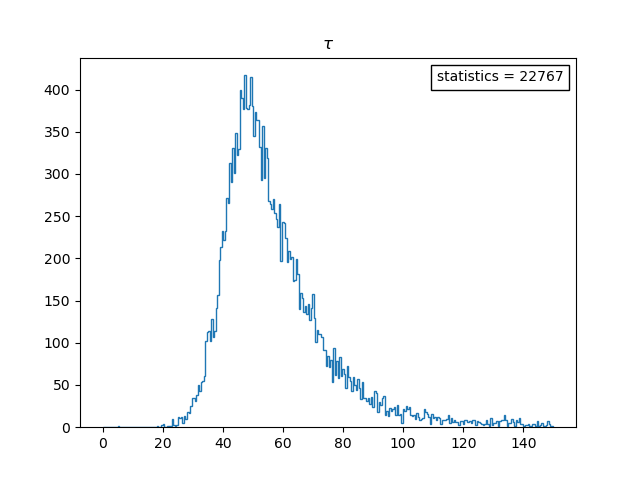

In [38]:
plt.close(3)
fig3, ax3 = plt.subplots()
ax3.hist = plt.hist(param_dict[ch_x]['tau'], bins= np.linspace(0.0, 150.0, 300), histtype='step')
text_in_box = AnchoredText(f"statistics = {len(param_dict[ch_x]['tau'])}", \
                                       loc='upper right')
ax3.add_artist(text_in_box)
ax3.set_title('$\\tau$')

### 5.1.3. <a id='toc5_1_3_'></a>[scale](#toc0_)

Text(0.5, 1.0, 'scale')

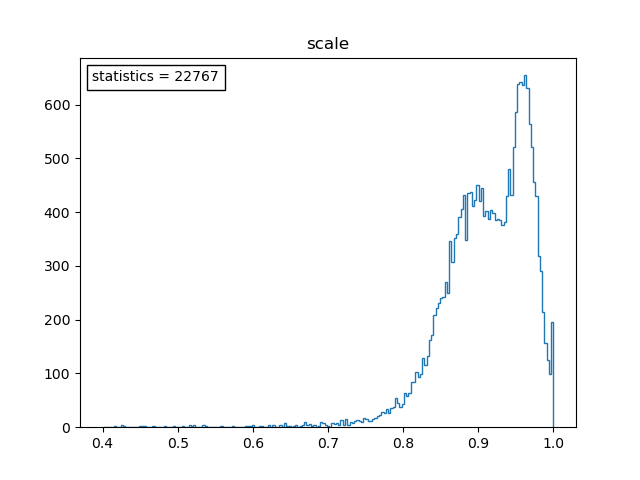

In [39]:
plt.close(4)
# plt.figure(4)
# plt.hist(param_dict[ch_x]['scale'], bins= np.linspace(0.4, 1.0, 100))
# text_in_box = AnchoredText(f"statistics = {len(param_dict[ch_x]['scale'])}", \
#                                        loc='upper left')
# ax = plt.gca()
# ax.add_artist(text_in_box)
# plt.title('scale')
# plt.show()

fig4, ax4 = plt.subplots()
ax4.hist(param_dict[ch_x]['scale'], bins= np.linspace(0.4, 1.0, 200), histtype='step')
text_in_box = AnchoredText(f"statistics = {len(param_dict[ch_x]['scale'])}", \
                                       loc='upper left')
ax4.add_artist(text_in_box)
ax4.set_title('scale')

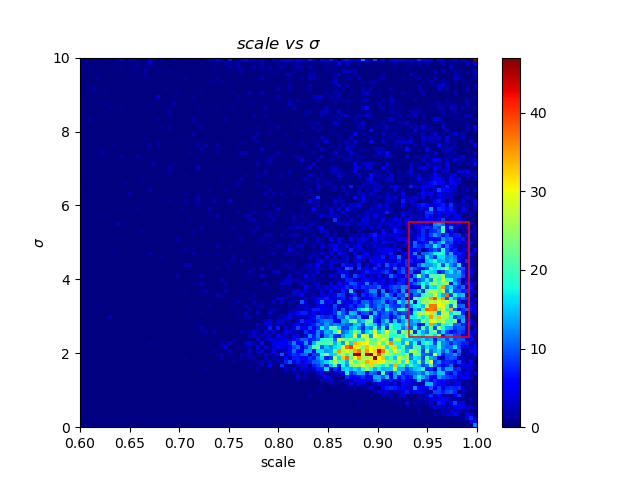

In [40]:
plt.close(5)
plt.figure(5)
ch_x = 'ch2'
red_win = patches.Rectangle((0.932, 2.44), 0.06, 3.10, linewidth=1.1, edgecolor='r', facecolor='none')

plt.hist2d(param_dict[ch_x]['scale'], param_dict[ch_x]['sigma'], bins = [np.linspace(0.6, 1.0, 100), np.linspace(0., 10., 100)], cmap='jet')
ax = plt.gca()
ax.add_patch(red_win)
plt.xlabel('scale')
plt.ylabel('$\sigma$')
plt.colorbar()
plt.title('$scale\ vs \ \\sigma$');

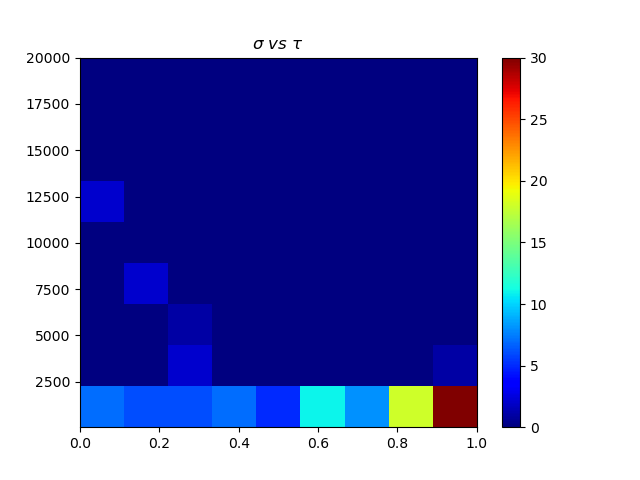

In [41]:
plt.close(6)
plt.figure(6)
plt.hist2d(param_dict[ch_x]['sigma'], param_dict[ch_x]['tau'], bins = [np.linspace(0.0, 1.0, 10), np.linspace(50e0, 20e3, 10)] , cmap='jet')
plt.colorbar()
plt.title('$\\sigma \ vs \ \\tau $');

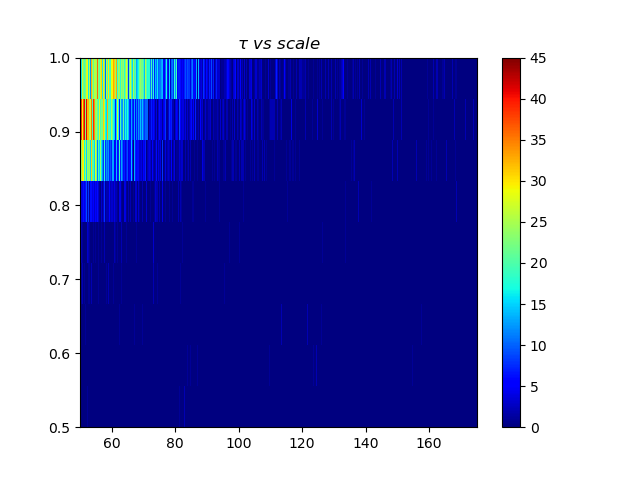

In [42]:
plt.close(7)
plt.figure(7)
plt.hist2d(param_dict[ch_x]['tau'], param_dict[ch_x]['scale'], bins = [np.linspace(50, 175, 1000), np.linspace(0.5, 1.0, 10)] , cmap='jet')
plt.colorbar()
plt.title('$\\tau \ vs \ scale $');

### 5.1.4. <a id='toc5_1_4_'></a>[Modification:  rectangular cut](#toc0_)

<span style='color:lightblue'> List of removed events </span>

In [43]:
### list of events which contribute to red window for Ch2
internal_points = []
for fit_index in fit_catalogue['ch2'].index.values:
    loop_fit_param = fit_catalogue['ch2']['fit_param'].loc[fit_index]
    param_point = (loop_fit_param[3], loop_fit_param[1]) # scale, sigma
    transformed_interior_point = red_win.get_data_transform().transform(param_point)
    if red_win.contains_point(transformed_interior_point, radius=0):
        internal_points.append(fit_index)

<span style='color:lightblue'> applying cut </span>

In [44]:
fit_catalogue['ch2'] = fit_catalogue['ch2'].drop(index = internal_points)

<span style='color:lightblue'> extracting param_dict out of DataFrames for Ch2 </span>

In [45]:
param_dict_cut = {}
# for ch_x in ch_str_ls:
for ch_x in ['ch2']: #ch_str_ls:
    t0_ls = []
    sigma_ls = []
    tau_ls = []
    scale_ls = []
    fit_param_x = {}
    for loop_index in fit_catalogue[ch_x].index.values:
        loop_fit_param = fit_catalogue[ch_x].loc[loop_index]['fit_param']
        t0_ls.append(loop_fit_param[0])
        sigma_ls.append(loop_fit_param[1])
        tau_ls.append(loop_fit_param[2])
        scale_ls.append(loop_fit_param[3])
    fit_param_x['t0'] = t0_ls
    fit_param_x['sigma'] = sigma_ls
    fit_param_x['tau'] = tau_ls
    fit_param_x['scale'] = scale_ls
    param_dict_cut[ch_x] = fit_param_x

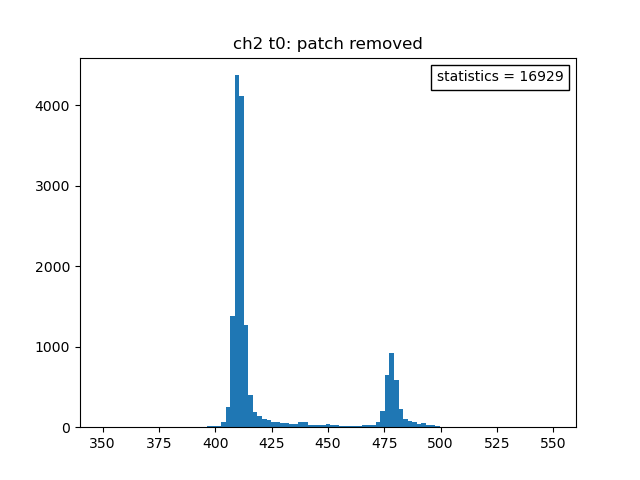

In [46]:
ch_x = 'ch2'
plt.close(22)
plt.figure(22)
text_in_box = AnchoredText(f"statistics = {len(param_dict_cut[ch_x]['t0'])}", \
                                       loc='upper right')
ax = plt.gca()
ax.add_artist(text_in_box)
plt.hist(param_dict_cut[ch_x]['t0'], bins = np.linspace(350, 550, 100))
plt.title(f"{ch_x} t0: patch removed")
plt.show()

#### 5.1.4.1. <a id='toc5_1_4_1_'></a>[$ \sigma$](#toc0_)

<ErrorbarContainer object of 3 artists>

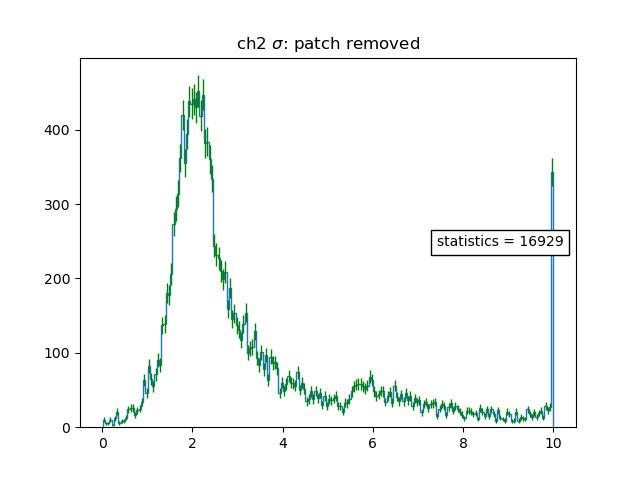

In [47]:
ch_x = 'ch2'
plt.close(23)
fig23, ax23 = plt.subplots()
hist_content, hist_edges, _hist_obj= ax23.hist(param_dict_cut[ch_x]['sigma'], bins=200, histtype='step', label='sigma') #, bins= np.linspace(1.0, 6.0, 10))
text_in_box = AnchoredText(f"statistics = {len(param_dict_cut[ch_x]['sigma'])}", \
                                       loc='center right')
ax23.add_artist(text_in_box)
ax23.set_title(f"{ch_x} $\\sigma$: patch removed")
## error bars
hist_centers = []
for i in range(hist_edges.shape[0]):
    center_variable = np.mean(hist_edges[i:i+2])
    hist_centers.append(center_variable)

hist_centers = np.array(hist_centers)

ax23.errorbar(hist_centers[:hist_content.shape[0]], hist_content, \
              yerr = np.sqrt(hist_content), elinewidth=1.0, linestyle='none', ecolor='green')

##### 5.1.4.1.1. <a id='toc5_1_4_1_1_'></a>[fitting](#toc0_)

In [48]:
x_range

range(30, 49)

In [49]:
p0_input = [2, 0.45, 500.0]
bounds_input = ([1.50, 0.0, 0.0], [2.15, 1.0, np.inf])

fitted_parameters_sigma, _pcov = curve_fit(f_gauss, 
                            hist_edges[x_range], hist_content[x_range], \
                            p0 = p0_input, 
                            sigma = np.sqrt(hist_content[x_range]),
                            absolute_sigma=True,
                            bounds = bounds_input,
                            )

In [50]:
fitted_parameters_sigma

array([     2.046,     0.4685,      522.6])

In [51]:
ax23.plot(hist_edges[x_range], f_gauss(hist_edges[x_range], *fitted_parameters_sigma), \
          color='red', label='fitted function')
ax23.legend()

In [52]:
chisqr_value = red_chisq(hist_content[x_range], \
    f_gauss(hist_edges[x_range], *fitted_parameters_sigma), fitted_parameters_sigma
    )

In [53]:
chisqr_in_box = AnchoredText(f"red. chisqr = {chisqr_value:.2f}", \
                                       loc='center right')
ax23.add_artist(chisqr_in_box)

#### 5.1.4.2. <a id='toc5_1_4_2_'></a>[$\tau$](#toc0_)

<ErrorbarContainer object of 3 artists>

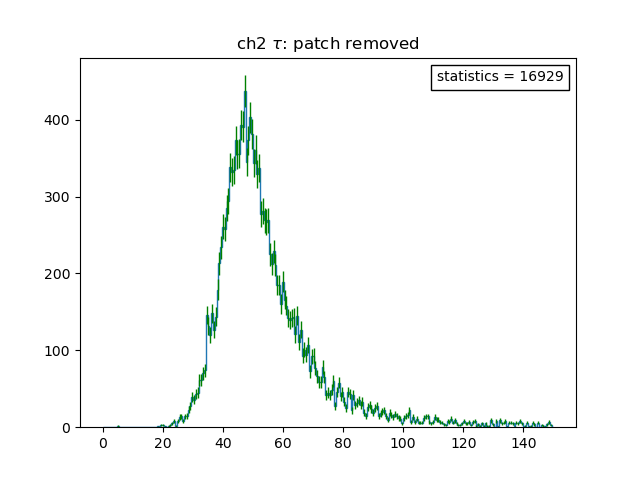

In [62]:
ch_x = 'ch2'
plt.close(24)
fig24, ax24 = plt.subplots()
hist_content, hist_edges, _hist_obj = ax24.hist(param_dict_cut[ch_x]['tau'], bins= np.linspace(0.0, 150.0, 250), histtype='step')
text_in_box = AnchoredText(f"statistics = {len(param_dict_cut[ch_x]['tau'])}", \
                                       loc='upper right')
ax24.add_artist(text_in_box)
ax24.set_title(f"{ch_x} $\\tau$: patch removed")

##error bars
hist_centers = []
for i in range(hist_edges.shape[0]):
    center_variable = np.mean(hist_edges[i:i+2])
    hist_centers.append(center_variable)

hist_centers = np.array(hist_centers)

ax24.errorbar(hist_centers[:hist_content.shape[0]], hist_content, yerr = np.sqrt(hist_content), elinewidth=1.0, linestyle='none', ecolor='green')

##### 5.1.4.2.1. <a id='toc5_1_4_2_1_'></a>[fitting here](#toc0_)

In [63]:
x_range = range(58, 91)

In [64]:
p0_input = [50.0, 9.0, 8000.0]
bounds_input = ([20.0, 0.05, 1.0], [60.0, 15.5, 10_000])

fitted_parameters_tau, _pcov = curve_fit(f_gauss, \
                            hist_edges[x_range], hist_content[x_range], \
                            p0 = p0_input, \
                            bounds = bounds_input, \
                            sigma = np.sqrt(hist_content[x_range]), \
                            absolute_sigma=True, \
                            # x_scale = [10, 1, 1000], \
                            method = 'trf', \
                            ## method = 'dogbox', \
                            )

### plotting
ax24.plot(hist_edges[x_range], f_gauss(hist_edges[x_range], *fitted_parameters_tau), color='red', label='fitted function')
ax24.legend(loc='lower right')

chisqr_value = red_chisq(hist_content[x_range], \
    f_gauss(hist_edges[x_range], *fitted_parameters_tau), fitted_parameters_tau
    )

chisqr_in_box = AnchoredText(f"red. chisqr = {chisqr_value:.2f}", \
                                       loc='center right')

ax24.add_artist(chisqr_in_box)

In [ ]:
fitted_parameters_tau

##### 5.1.4.2.2. <a id='toc5_1_4_2_2_'></a>[Fitting with iMinuit](#toc0_)

In [ ]:
# import iminuit
# from iminuit.cost import LeastSquares
# from iminuit import Minuit

In [ ]:
# least_squares = LeastSquares(x_values[58:91], hist_content[58:91], np.sqrt(hist_content[58:91]), f_gauss)
# # least_squares = LeastSquares(x_values, hist_content[:x_values.shape[0]], np.ones(x_values.shape[0]), f_gauss)

In [ ]:
# m_obj = Minuit(least_squares, g_mean = 50.0, g_sigma = 9.5, g_k = 8000)

In [ ]:
# m_obj.simplex()

In [ ]:
# m_obj.migrad()

#### 5.1.4.3. <a id='toc5_1_4_3_'></a>[scale](#toc0_)

Text(0.5, 1.0, 'ch2 scale: patch removed')

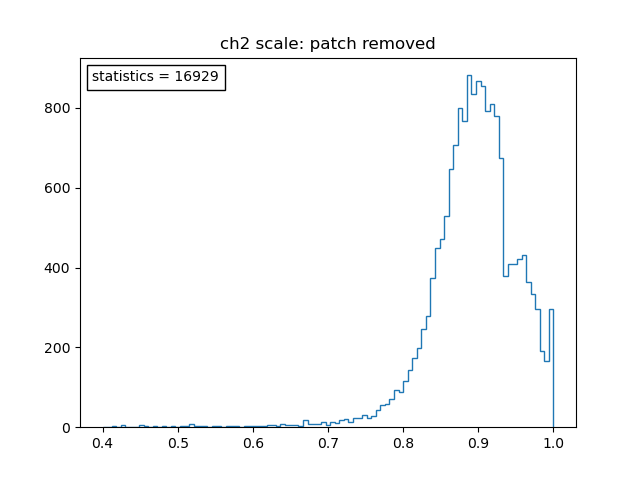

In [66]:
ch_x = 'ch2'
plt.close(25)
fig25, ax25 = plt.subplots()
hist_content, hist_edges, _hist_obj = ax25.hist(param_dict_cut[ch_x]['scale'], \
                                                bins= np.linspace(0.4, 1.0, 100), histtype='step')
text_in_box = AnchoredText(f"statistics = {len(param_dict_cut[ch_x]['scale'])}", \
                                       loc='upper left')
ax25.add_artist(text_in_box)
ax25.set_title(f"{ch_x} scale: patch removed")

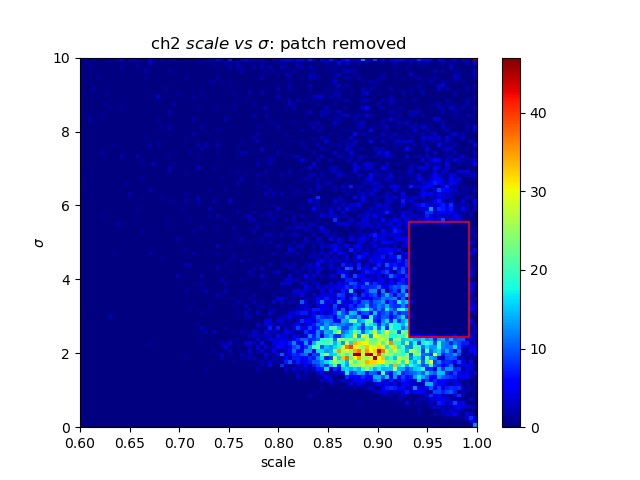

In [77]:
ch_x = 'ch2'
plt.close(26)
fig26, ax26 = plt.subplots()
red_win = patches.Rectangle((0.932, 2.44), 0.06, 3.10, linewidth=1.1, edgecolor='r', facecolor='none')

hist_h, hist_xedges, hist_yedges, hist_im = ax26.hist2d(param_dict_cut[ch_x]['scale'], param_dict_cut[ch_x]['sigma'], \
           bins = [np.linspace(0.6, 1.0, 100), np.linspace(0., 10., 100)], cmap='jet')
ax26.add_patch(red_win)
ax26.set_xlabel('scale')
ax26.set_ylabel('$\sigma$')
fig26.colorbar(hist_im)
ax26.set_title(f"{ch_x} $scale\ vs \ \\sigma$: patch removed");

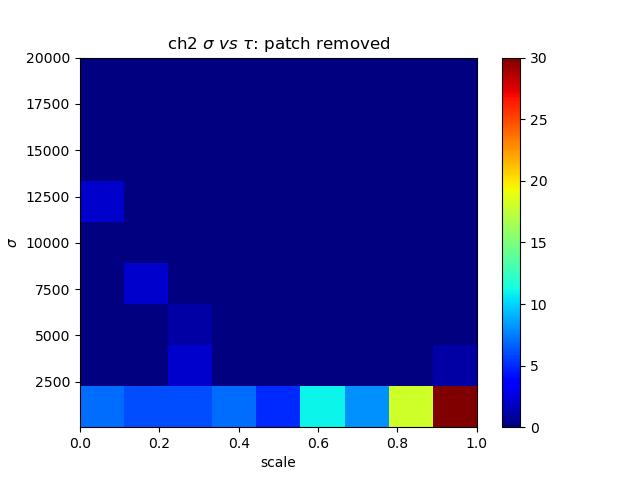

In [82]:
ch_x = 'ch2'
plt.close(27)
fig27, ax27 = plt.subplots()
hist_h, hist_xedges, hist_yedges, hist_im = ax27.hist2d(param_dict_cut[ch_x]['sigma'], param_dict_cut[ch_x]['tau'], \
           bins = [np.linspace(0.0, 1.0, 10), np.linspace(50e0, 20e3, 10)] , cmap='jet')
ax27.set_xlabel('scale')
ax27.set_ylabel('$\sigma$')
fig27.colorbar(hist_im)
ax27.set_title(f"{ch_x} $\\sigma \ vs \ \\tau $: patch removed");

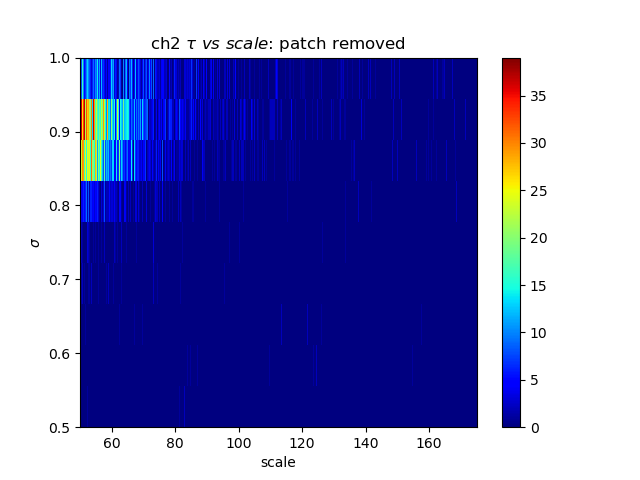

In [83]:
ch_x = 'ch2'
plt.close(28)
fig28, ax28 = plt.subplots()
hist_h, hist_xedges, hist_yedges, hist_im = ax28.hist2d(param_dict_cut[ch_x]['tau'], \
            param_dict_cut[ch_x]['scale'], bins = [np.linspace(50, 175, 1000), np.linspace(0.5, 1.0, 10)] ,\
            cmap='jet')

ax28.set_xlabel('scale')
ax28.set_ylabel('$\sigma$')
fig28.colorbar(hist_im)
ax28.set_title(f"{ch_x} $\\tau \ vs \ scale $: patch removed");

In [81]:
sys.exit()

SystemExit: 

/home/sarthak/miniconda3/envs/jar/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3561: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


## 5.2. <a id='toc5_2_'></a>[ch1](#toc0_)

In [ ]:
ch_x = ch_str_ls[1]

In [ ]:
ch_x = ch_str_ls[1]
plt.close(8)
plt.figure(8)
text_in_box = AnchoredText(f"statistics = {len(param_dict_cut[ch_x]['t0'])}", \
                                       loc='upper right')
ax = plt.gca()
ax.add_artist(text_in_box)
plt.hist(param_dict_cut[ch_x]['t0'], bins = np.linspace(350, 550, 100))
plt.title('t0')
plt.show()

In [ ]:
plt.close(9)
plt.figure(9)
plt.hist(param_dict_cut[ch_x]['sigma'], bins = 100) #, bins= np.linspace(1.0, 6.0, 10))
text_in_box = AnchoredText(f"statistics = {len(param_dict_cut[ch_x]['sigma'])}", \
                                       loc='upper right')
ax = plt.gca()
ax.add_artist(text_in_box)
plt.title('$\\sigma$')
plt.show()

In [ ]:
plt.close(10)
plt.figure(10)
plt.hist(param_dict_cut[ch_x]['tau'], bins= np.linspace(0.0, 150.0, 10))
text_in_box = AnchoredText(f"statistics = {len(param_dict_cut[ch_x]['tau'])}", \
                                       loc='upper right')
ax = plt.gca()
ax.add_artist(text_in_box)
plt.title('$\\tau$')
plt.show()

In [ ]:
plt.close(11)
plt.figure(11)
plt.hist(param_dict_cut[ch_x]['scale'], bins= np.linspace(0.4, 1.0, 10))
text_in_box = AnchoredText(f"statistics = {len(param_dict_cut[ch_x]['scale'])}", \
                                       loc='upper left')
ax = plt.gca()
ax.add_artist(text_in_box)
plt.title('scale')
plt.show()

In [ ]:
plt.close(12)
plt.figure(12)
plt.hist2d(param_dict_cut[ch_x]['scale'], param_dict_cut[ch_x]['sigma'], \
    bins = [np.linspace(0.5, 1.0, 100), np.linspace(0., 10., 100)], cmap='jet')
plt.xlabel('scale')
plt.ylabel('$\sigma$')
plt.colorbar()
plt.title('$scale\ vs \ \\sigma$');

In [ ]:
plt.close(13)
plt.figure(13)
plt.hist2d(param_dict_cut[ch_x]['sigma'], param_dict_cut[ch_x]['tau'], bins = [np.linspace(0.0, 1.0, 10), np.linspace(50e0, 20e3, 10)] , cmap='jet')
plt.colorbar()
plt.title('$\\sigma \ vs \ \\tau $');

In [ ]:
plt.close(14)
plt.figure(14)
plt.hist2d(param_dict_cut[ch_x]['tau'], param_dict_cut[ch_x]['scale'], bins = [np.linspace(50, 175, 1000), np.linspace(0.5, 1.0, 10)] , cmap='jet')
plt.colorbar()
plt.title('$\\tau \ vs \ scale $');

## 5.3. <a id='toc5_3_'></a>[ch0](#toc0_)

In [ ]:
ch_x = ch_str_ls[0]

In [ ]:
plt.close(15)
plt.figure(15)
text_in_box = AnchoredText(f"statistics = {len(param_dict_cut[ch_x]['t0'])}", \
                                       loc='upper right')
ax = plt.gca()
ax.add_artist(text_in_box)
plt.hist(param_dict_cut[ch_x]['t0'], bins = 100)
plt.title('t0')
plt.show()

In [ ]:
plt.close(16)
plt.figure(16)
plt.hist(param_dict_cut[ch_x]['sigma'], bins = 100) #, bins= np.linspace(1.0, 6.0, 10))
text_in_box = AnchoredText(f"statistics = {len(param_dict_cut[ch_x]['sigma'])}", \
                                       loc='upper right')
ax = plt.gca()
ax.add_artist(text_in_box)
plt.title('$\\sigma$')
plt.show()

In [ ]:
plt.close(17)
plt.figure(17)
plt.hist(param_dict_cut[ch_x]['tau'], bins= np.linspace(0.0, 150.0, 10))
text_in_box = AnchoredText(f"statistics = {len(param_dict_cut[ch_x]['tau'])}", \
                                       loc='upper right')
ax = plt.gca()
ax.add_artist(text_in_box)
plt.title('$\\tau$')
plt.show()

In [ ]:
plt.close(18)
plt.figure(18)
plt.hist(param_dict_cut[ch_x]['scale'], bins= np.linspace(0.4, 1.0, 10))
text_in_box = AnchoredText(f"statistics = {len(param_dict_cut[ch_x]['scale'])}", \
                                       loc='upper left')
ax = plt.gca()
ax.add_artist(text_in_box)
plt.title('scale')
plt.show()

In [ ]:
plt.close(19)
plt.figure(19)
plt.hist2d(param_dict_cut[ch_x]['scale'], param_dict_cut[ch_x]['sigma'], \
    bins = [np.linspace(0.5, 1.0, 100), np.linspace(0., 10., 100)], cmap='jet')
plt.xlabel('scale')
plt.ylabel('$\sigma$')
plt.colorbar()
plt.title('$scale\ vs \ \\sigma$');

In [ ]:
plt.close(20)
plt.figure(20)
plt.hist2d(param_dict_cut[ch_x]['sigma'], param_dict_cut[ch_x]['tau'], bins = [np.linspace(0.0, 1.0, 10), np.linspace(50e0, 20e3, 10)] , cmap='jet')
plt.colorbar()
plt.title('$\\sigma \ vs \ \\tau $');

In [ ]:
plt.close(21)
plt.figure(21)
plt.hist2d(param_dict_cut[ch_x]['tau'], param_dict_cut[ch_x]['scale'], bins = [np.linspace(50, 175, 1000), np.linspace(0.5, 1.0, 10)] , cmap='jet')
plt.colorbar()
plt.title('$\\tau \ vs \ scale $');

<hr> </hr>